# Scikit-learn tutorial

https://www.youtube.com/watch?v=0B5eIE_1vpU 

## 1.Scikit-learn

In [ ]:
from sklearn.datasets import fetch_california_housing
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

X, y = fetch_california_housing(return_X_y=True)
model = KNeighborsRegressor()
model.fit(X, y)
pred = model.predict(X)

plt.scatter(pred, y, alpha = 0.01)
plt.show()

In [ ]:
from sklearn.datasets import fetch_california_housing
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

model = LinearRegression()
model.fit(X, y)
pred = model.predict(X)

plt.scatter(y, pred, alpha = 0.01)
plt.show()

In [ ]:
import seaborn as sns 

df = sns.load_dataset('penguins')

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

X, y = fetch_california_housing(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y)

model = make_pipeline(
    StandardScaler(),
    KNeighborsRegressor()
)

model.fit(X_train, y_train)

pred = model.predict(X_test)

sns.set()
plt.scatter(pred, y_test, alpha = 0.05)
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV
import pandas as pd

cv = GridSearchCV(
    estimator = model, 
    param_grid = {
        'kneighborsregressor__n_neighbors': range(1, 11)
    }, 
    cv = 3
)

cv.fit(X_train, y_train)
pd.DataFrame(cv.cv_results_)

In [ ]:
from sklearn.datasets import fetch_california_housing

california_housing = fetch_california_housing()
print(california_housing['DESCR'])

## 2. Preprocessing

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
sns.set()

In [ ]:
# load dataset
df = pd.read_csv('../data/preprocessing/drawndata1.csv')
X = df[['x', 'y']]
y = df['z'] == 'a'

# plot
plt.scatter(
    X['x'], X['y'], 
    c = y, 
    cmap = 'RdYlBu',
    alpha = 0.5
)
plt.show()

In [ ]:
# standardise
X_new = StandardScaler().fit_transform(X)
plt.scatter(
    X_new[:, 0], X_new[:, 1],
    c = y,
    cmap = 'RdYlBu', 
    alpha = 0.5
)

In [ ]:
# generate data
x = np.random.exponential(10, (1000)) + np.random.normal(0, 1, (1000))

plt.hist((x - np.mean(x)) / np.std(x), 30)
plt.show()

In [ ]:
from sklearn.preprocessing import QuantileTransformer

X_new = QuantileTransformer().fit_transform(X)
plt.scatter(
    X_new[:, 0], X_new[:, 1],
    c = y,
    cmap = 'RdYlBu',
    alpha = 0.5
)
plt.show()

In [ ]:
df = pd.read_csv('../data/preprocessing/drawndata2.csv')
X = df[['x', 'y']]
y = df['z'] == 'a'
plt.scatter(
    X['x'], X['y'],
    c = y,
    cmap = 'RdYlBu',
    alpha = 0.5
)
plt.show()

In [ ]:
pipe = make_pipeline(
    QuantileTransformer(),
    LogisticRegression()
)

pred = pipe.fit(X, y)
plt.scatter(
    X['x'], X['y'],
    c = pred.predict(X),
    cmap = 'RdYlBu',
    alpha = 0.5
)
plt.show()

In [ ]:
pipe = make_pipeline(
    PolynomialFeatures(),
    LogisticRegression()
)

pred = pipe.fit(X, y)
plt.scatter(
    X['x'], X['y'],
    c = pred.predict(X),
    cmap = 'RdYlBu',
    alpha = 0.5
)
plt.show()

In [ ]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(sparse = False, handle_unknown = 'ignore')

In [ ]:
arr = np.array(['low', 'low', 'high', 'medium']).reshape(-1, 1)
enc.fit_transform(arr)

In [ ]:
enc.transform([['zero']])

## 3.Metrics

In [ ]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score, recall_score

In [ ]:
# load data
df = pd.read_csv('../data/metrics/creditcard.csv')[: 80_000]
X = df.drop(columns = ['Time', 'Amount', 'Class'])
y = df['Class']

print(f"fraud: {y.sum()}\nnot fraud: {len(y) - y.sum()}")

In [ ]:
pred_0 = LogisticRegression(
    max_iter = 1000
).fit(X, y).predict(X).sum()

pred_1 = LogisticRegression(
    class_weight = {0: 1, 1: 2}, # balance the classes
    max_iter = 1000
).fit(X, y).predict(X).sum()

# check how much the param weight can affect the result
print(f"res0: {pred_0}\nres1: {pred_1}")

In [ ]:
# search the best class weight
grid = GridSearchCV(
    estimator = LogisticRegression(max_iter = 1000), 
    param_grid = {
        # try 1 to 3
        'class_weight': [{0: 1, 1: v} for v in range(1, 4)]
    }, 
    cv = 4, 
    n_jobs = -1
)
display(pd.DataFrame(grid.fit(X, y).cv_results_).T)
print("how did the grid search determine which score to use?")

In [ ]:
# model = LogisticRegression()
# ??model.score
print('logistic regression score is the mean accuracy')

#### accuracy score
accuracy score is the ratio of number of correct predictions to the total number of input samples.

### precision score
precision score is the ratio of number of true positives to the number of true positives and false positives.

### recall score
recall score is the ratio of number of true positives to the number of true positives and false negatives.

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score, recall_score, make_scorer

def min_recall_precision(y_true, y_pred):
    return min(
        recall_score(y_true, y_pred), 
        precision_score(y_true, y_pred)
    )

grid = GridSearchCV(
    estimator = LogisticRegression(max_iter = 1000),
    param_grid = {
        'class_weight': [{0: 1, 1: v} for v in np.linspace(1, 20, 30)]
    },
    # use precision and recall as metrics
    # use make_scorer to convert the function to a scorer
    scoring = {
        'precision': make_scorer(precision_score),
        'recall': make_scorer(recall_score), 
        'min_both': make_scorer(min_recall_precision)
    },
    # optimise over precision
    refit = 'precision',
    return_train_score = True, 
    cv = 10,
    n_jobs = -1,
)

grid.fit(X, y)

pd.DataFrame(grid.cv_results_)

In [ ]:
pd.DataFrame(grid.cv_results_).T

In [ ]:
df = pd.DataFrame(grid.cv_results_)

for score in ['mean_test_recall', 'mean_test_precision', 'mean_test_min_both']:
    plt.plot(
        # use the class weight as x axis
        [i[1] for i in df['param_class_weight']], 
        df[score], 
        label = score
    )
plt.legend()
plt.show()

In [ ]:
df = pd.DataFrame(grid.cv_results_)

for score in ['mean_test_recall', 'mean_test_precision', 'mean_test_min_both']:
    plt.plot(
        # use the class weight as x axis
        [i[1] for i in df['param_class_weight']], 
        df[score.replace('test', 'train')], 
        label = score
    )
plt.legend()
plt.show()

## 4. Meta Estimator

how can we add post processing to a pipeline

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
from sklego.meta import Thresholder


sns.set()

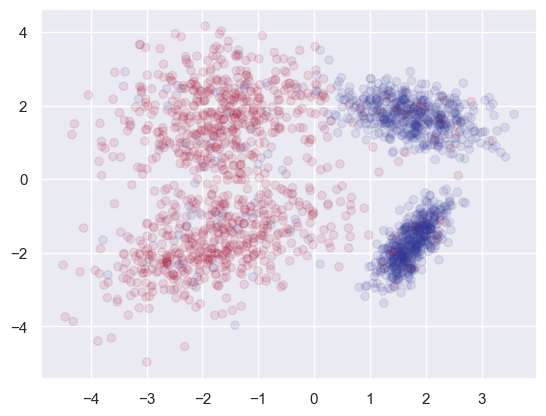

In [6]:
X, y = make_classification(
    n_samples = 2000, 
    n_features = 2, 
    n_redundant = 0, 
    random_state = 21, 
    class_sep = 1.75, 
    flip_y = 0.1
)

plt.scatter(X[:, 0], X[:, 1], c = y, cmap = 'RdYlBu', alpha = 0.1)
plt.show()

In [13]:
clf1 = LogisticRegression().fit(X, y)
clf2 = KNeighborsClassifier(n_neighbors = 10).fit(X, y)

# you can combine multiple classifiers at the same 
# time using VotingClassifier
clf3 = VotingClassifier(
    estimators = [
        ('lr', clf1),
        ('knn', clf2)
    ],
    voting = 'soft', 
    weights = [1, 2]
).fit(X, y)

clf3.fit(X, y)

VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('knn', KNeighborsClassifier(n_neighbors=10))],
                 voting='soft', weights=[1, 2])

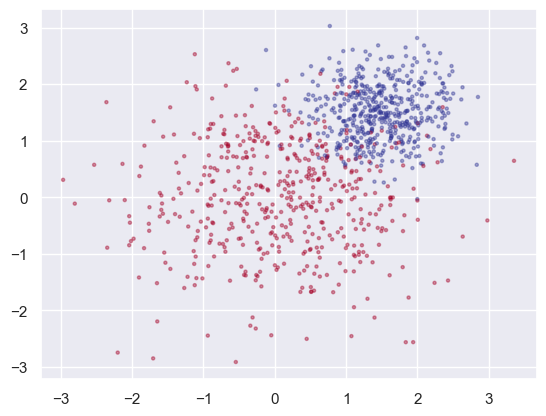

In [17]:
from sklearn.datasets import make_blobs

X, y = make_blobs(1000, centers = [[0, 0], [1.5, 1.5]], cluster_std = [1, 0.5])
plt.scatter(X[:, 0], X[:, 1], c = y, s = 5, cmap = 'RdYlBu', alpha = 0.4)